In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
#Q6
#We want to plot isocontours of various Gaussian PDFs

def gaussian(x, mean, cov):
    
    x_translated = x - mean
    
    quad = 1/2* np.dot(x_translated.T, np.dot(cov,x_translated))
    
    normalization = 1/(2*np.pi * np.sqrt(np.linalg.det(cov)))
    
    return  1/normalization * np.exp(-(quad))


n_pts = 100
max_val = 2.5

xcoords = np.linspace(-max_val,max_val,n_pts)
ycoords = np.linspace(-max_val,max_val,n_pts)
x, y = np.meshgrid(xcoords,ycoords)

#Make height array

def z(mean,cov):

    z1 = np.zeros((n_pts,n_pts))

    for i in range(n_pts):
        for j in range(n_pts):
        
            coords = np.array([xcoords[i],ycoords[j]])
            z1[i,j] += gaussian(coords,mean,cov)

    return z1

Text(0.5, 1.0, 'Isocontour values for a 2d multivariate Gaussian')

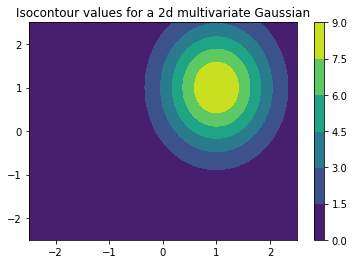

In [54]:
#First part
mean1= np.array([1,1])
cov1 = np.array([[1,0],[0,2]])


CS = plt.contourf(x,y,z(mean1,cov1))
cbar = plt.colorbar(CS)
plt.title("Isocontour values for a 2d multivariate Gaussian")

Text(0.5, 1.0, 'Isocontour values for a 2d multivariate Gaussian')

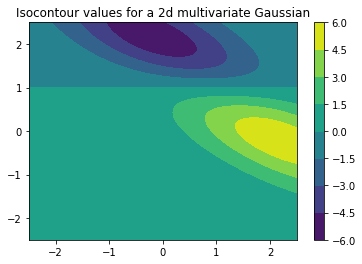

In [55]:
#Third part
mean31 = np.array([0,2])
mean32 = np.array([2,0])

cov31 = np.array([[2,1],[1,1]])
cov32 = cov31

CS = plt.contourf(x,y,z(mean31,cov31)-z(mean32,cov32))
cbar = plt.colorbar(CS)
plt.title("Isocontour values for a 2d multivariate Gaussian")

#Notice the decision bdy (isocontour at 0 value) is linear, since the covariances are the same

Text(0.5, 1.0, 'Isocontour values for a 2d multivariate Gaussian')

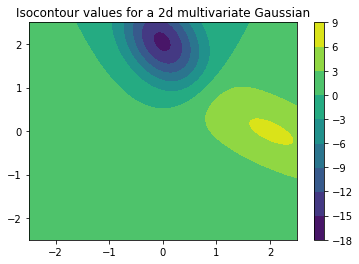

In [56]:
#Fourth part
mean41 = np.array([0,2])
mean42 = np.array([2,0])

cov41 = np.array([[2,1],[1,1]])
cov42 = np.array([[2,1],[1,4]])


CS = plt.contourf(x,y,z(mean41,cov41)-z(mean42,cov42))
cbar = plt.colorbar(CS)
plt.title("Isocontour values for a 2d multivariate Gaussian")

#Notice decision bdy is not linear anymore

In [125]:
#Q7

#Generate random sample

x1 = np.random.normal(3,3,100)
x2 = 1/2 * x1 + np.random.normal(4,2,100)

In [126]:
#Sample mean

x1_avg = 1/100*np.sum(x1)
x2_avg = 1/100*np.sum(x2)

sample_mean = np.array([x1_avg,x2_avg])

sample_mean

array([3.15320006, 5.5227163 ])

In [127]:
#Covariance matrix

translated_vars = np.array([x1 - x1_avg,x2-x2_avg])

sample_cov = 0

for i in range(100):
    sample_cov += 1/100* np.outer((translated_vars.T)[i],(translated_vars.T)[i])
    
sample_cov

array([[7.54777019, 2.99948901],
       [2.99948901, 4.39011112]])

In [134]:
#Get eigenvalues & eigenvectors

eigenvalues= np.linalg.eig(sample_cov)[0]
eigenvectors = np.linalg.eig(sample_cov)[1].T

print(eigenvalues,eigenvectors)

[9.35857736 2.57930395] [[ 0.85609034  0.51682621]
 [-0.51682621  0.85609034]]


Text(0, 0.5, 'y data')

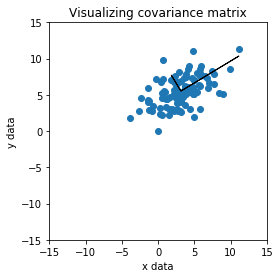

In [157]:
#Plot points and covariance eigenvectors

plt.scatter(x1,x2)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gca().set_aspect('equal', adjustable='box')
plt.arrow(x1_avg,x2_avg,eigenvalues[0]*eigenvectors[0,0],eigenvalues[0]*eigenvectors[0,1])
plt.arrow(x1_avg,x2_avg,eigenvalues[1]*eigenvectors[1,0],eigenvalues[1]*eigenvectors[1,1])

plt.title("Visualizing covariance matrix")
plt.xlabel("x data")
plt.ylabel("y data")

In [151]:
#Rotation step

rotated_vars = np.zeros([2,100]).T

for i in range(100):
    rotated_vars[i] += np.dot(eigenvectors, translated_vars.T[i])
    
rotated_x1 = rotated_vars.T[0]
rotated_x2 = rotated_vars.T[1]

Text(0.5, 1.0, 'Decorrelated data')

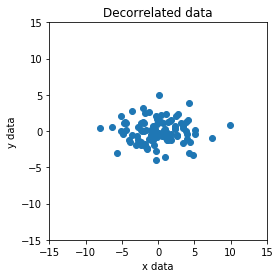

In [309]:
#New plot
plt.scatter(rotated_x1,rotated_x2)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel("x data")
plt.ylabel("y data")
plt.title("Decorrelated data")

#Here, the coordinate axes are aligned with the eigenvectors of the covariance matrix

In [41]:
#Q8 Gaussian classifier for MNIST data

#Load data
mnist_data = np.load('mnist-data-hw3.npz')
print(mnist_data.files)

pre_training_data = mnist_data['training_data']
training_labels = mnist_data['training_labels']

pre_data_length = np.shape(pre_training_data)[0]
data_size = 28*28

['training_data', 'training_labels', 'test_data']


In [43]:
#First some processing

#Vectorize
training_data_unscaled = pre_training_data.reshape(pre_data_length,data_size)

#Rescale
training_data = np.zeros(np.shape(training_data_unscaled))
for i in range(pre_data_length):
    training_data[i] += 1/np.linalg.norm(training_data_unscaled[i])*training_data_unscaled[i]

In [63]:
#Now need to separate into classes

def class_labels(i, size):
    label_list = []    
    for j in range(size):
        if training_labels[j] == i:
            label_list.append(j)
    return label_list

def class_data(i,size):
    return training_data[class_labels(i,size)]

In [64]:
#Compute mean and covariance for each class

def sample_mean(i,size):
    
    return np.mean(class_data(i,size),0)

def sample_cov(i,size):
    
    class_length = np.shape(class_data(i,size))[0]
    X = class_data(i,size)-sample_mean(i,size)
    sample_cov = 1/class_length*np.matmul(X.T,X)
    
    return sample_cov


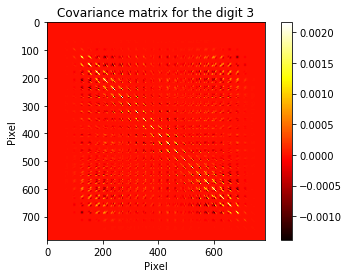

In [65]:
#Visualize one of the covariance matrices

plt.imshow(sample_cov(3,50000),cmap ='hot')
plt.xlabel('Pixel')
plt.ylabel("Pixel")
plt.title("Covariance matrix for the digit 3")
plt.colorbar()

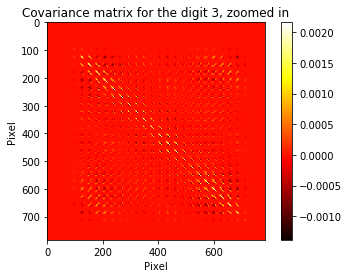

In [66]:
#Zoomed in on the middle
plt.imshow(sample_cov(3,50000),cmap ='hot')
plt.xlabel('Pixel')
plt.ylabel("Pixel")
plt.title("Covariance matrix for the digit 3, zoomed in")
plt.colorbar()

In [77]:
#Notice the largest values occur on the diagonal, but some of the off diagonal values are comparable:
print('Percent difference between variance and covariance is',100/(cov_show[150,150])*(np.abs(np.max(cov_show[150,151:200])-cov_show[150,150])),'%')

#This means the different pixels are correlated, which is not surprising: the images are not just random pixels.

Percent difference between variance and covariance is 11.440050907618684 %


In [168]:
#We now select a validation set, note data is already shuffled
validation_data = training_data[50000:]
validation_labels = training_labels[50000:]

training_size = np.array([100,200,500,1000,2000,5000,10000,50000])

In [197]:
#Linear discriminant analysis
#To perform LDA, we first need to obtain the pooled covariance martrix

def pooled_cov(size):
    temp = np.zeros((data_size,data_size))
    for i in range(10):
        temp += 1/size*np.shape(class_data(i,size))[0]*sample_cov(i,size)
    return temp

#Store sample means and covariances

sample_means = [[sample_mean(i,size) for size in training_size] for i in range(10)]
sample_covs = [[sample_cov(i,size) for size in training_size] for i in range(10)]

In [134]:
#Implement linear discriminant function

#First compute and store the vectors appearing in the decision fct

def LDA_vector(size,label):
    return np.linalg.lstsq(pooled_cov(size),sample_mean(label,size), rcond = -1)[0]

#Store
LDA_vectors = [[LDA_vector(size,i) for size in training_size] for i in range(10)]    

In [185]:
#Probability for each class

def p(i,size):
        return 1/size * np.shape(class_data(i,size))[0]
    
#Store

prob = [[p(i,size) for size in training_size] for i in range(10)]
    
#Decision function

def LDA_value(size, label, pt):
    
    size_index = np.argwhere(training_size==size)[0][0]
    vec = LDA_vectors[label][size_index]
    
    return vec@pt -1/2* vec@sample_means[label][size_index] +np.log(prob[label][size_index])

#Classifier

def pred_class(size, pt):
    
    LDA_values = [LDA_value(size,i,pt) for i in range(10)]
    
    return np.argmax(LDA_values)

#Check accuracy for various training sizes

def error(size):
    val_size = np.shape(validation_data)[0]
    temp = 0
    for i in range(val_size):
        if pred_class(size,validation_data[i]) != validation_labels[i]:
            temp += 1/val_size
    return temp
    

In [190]:
#Obtain error for all training sizes:

errors = [error(size) for size in training_size]

Text(0.5, 1.0, 'Validation error rate for LDA as a function of training set size')

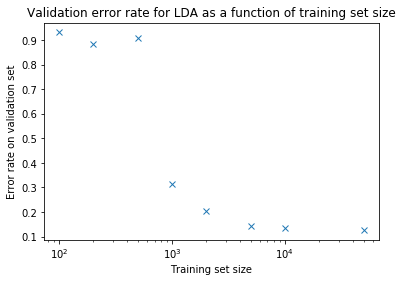

In [196]:
#Plotting

plt.plot(training_size,errors,'x')
plt.xlabel("Training set size")
plt.ylabel("Error rate on validation set")
plt.xscale('log')
plt.title("Validation error rate for LDA as a function of training set size")

In [215]:
#Quadratic discriminant analysis


#First store inverses
inv_cov = [[np.linalg.pinv(sample_cov(i,size)) for size in training_size] for i in range(10)]


def QDA_value(size, label, pt):
    
    size_index = np.argwhere(training_size==size)[0][0]
    translated_pt = pt - sample_means[label][size_index]
    quad = translated_pt@inv_cov[label][size_index]@translated_pt
    
    return -1/2 * quad + np.log(prob[label][size_index])

#Removed the detemrinant term, as all were infinite

def QDA_class(size,pt):
    
    QDA_values = [QDA_value(size,i,pt) for i in range(10)]
    
    return np.argmax(QDA_values)

#Check accuracy for various training sizes

def QDA_error(size):
    val_size = np.shape(validation_data)[0]
    temp = 0
    for i in range(val_size):
        if QDA_class(size,validation_data[i]) != validation_labels[i]:
            temp += 1/val_size
    return temp

In [216]:
#Obtain error for all training sizes:

QDA_errors = [QDA_error(size) for size in training_size]

Text(0.5, 1.0, 'Validation error rate for QDA as a function of training set size')

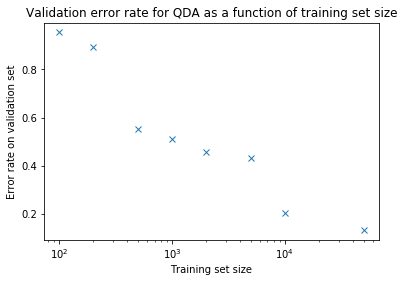

In [218]:
#Plotting

plt.plot(training_size,QDA_errors,'x')
plt.xlabel("Training set size")
plt.ylabel("Error rate on validation set")
plt.xscale('log')
plt.title("Validation error rate for QDA as a function of training set size")

In [226]:
#Let's now see which digit is easiest/hardest to correctly identify, say with LDA

def error_class(i, size):
    
    val_size = np.shape(validation_data)[0]
    class_val_size = np.count_nonzero(validation_labels==i)
    temp = 0
    for j in range(val_size):
        if validation_labels[j] == i and pred_class(size,validation_data[j]) != i:
            temp+= 1/class_val_size
                
    return temp

error_classes = [[error_class(i,size) for size in training_size] for i in range(10)]

Text(0.5, 1.0, 'Which digit is easiest to classify?')

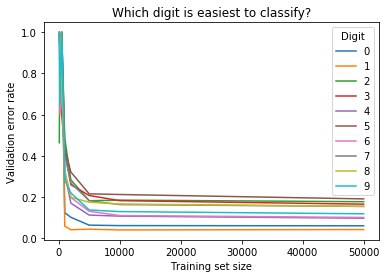

In [243]:
for i in range(10):
    plt.plot(training_size,error_classes[i], label = str(i))


plt.legend(title = "Digit")
plt.xlabel("Training set size")
plt.ylabel("Validation error rate")
plt.title("Which digit is easiest to classify?")
